In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import time
import csv

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [9]:
# Загрузка данных
train_data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")

# Проверка первых строк данных
print("Train Data:")
print(train_data.head())
print("\nTest Data:")
print(test_data.head())

Train Data:
      Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  14038          35    2.0  47.981561   29.442751            6.0      7   
1  15053          41    3.0  65.683640   40.049543            8.0      7   
2   4765          53    2.0  44.947953   29.197612            0.0      8   
3   5809          58    2.0  53.352981   52.731512            9.0      8   
4  10783          99    1.0  39.649192   23.776169            7.0     11   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0         9.0       1969   0.089040         B         B        33      7976   
1         9.0       1978   0.000070         B         B        46     10309   
2        12.0       1968   0.049637         B         B        34      7759   
3        17.0       1977   0.437885         B         B        23      5735   
4        12.0       1976   0.012339         B         B        35      5776   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2 

In [28]:
# Анализ данных
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     10000 non-null  float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Social_1       10000 non-null  int64  
 11  Social_2       10000 non-null  int64  
 12  Social_3       10000 non-null  int64  
 13  Healthcare_1   10000 non-null  float64
 14  Helthcare_2    10000 non-null  int64  
 15  Shops_1        10000 non-null  int64  
 16  Price          10000 non-null  float64
 17  Ecology_2_B    10000 non-null  bool   
 18  Ecology

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,36.266040,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,76.609981,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,25.527399,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,41.427234,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


### Описание датасета

Id - идентификатор объекта
DistrictId - идентификатор района
Rooms - количество комнат
Square - площадь
LifeSquare - жилая площадь
KitchenSquare - площадь кухни
Floor - этаж
HouseFloor - этажность дома
HouseYear - год постройки
Ecology_1, Ecology_2, Ecology_3 - показатели экологической среда
Social_1, Social_2, Social_3 - показатели социальная среда
Healthcare_1, Healthcare_2 - показатели здаравоохранения
Shops_1, Shops_2 - показатели доступности магазинов
Price - цена (целевая переменная)

In [29]:
# Поиск пропущенных значений
missing_values = train_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Price            0
Ecology_2_B      0
Ecology_3_B      0
Shops_2_B        0
dtype: int64


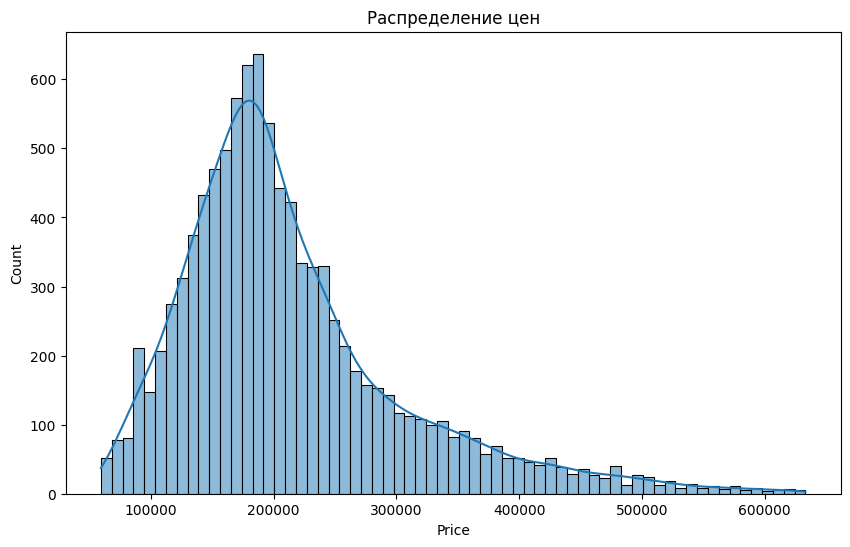

In [30]:
# Визуализация распределения целевой переменной
plt.figure(figsize=(10, 6))
sns.histplot(train_data["Price"], kde=True)
plt.title("Распределение цен")
plt.show()

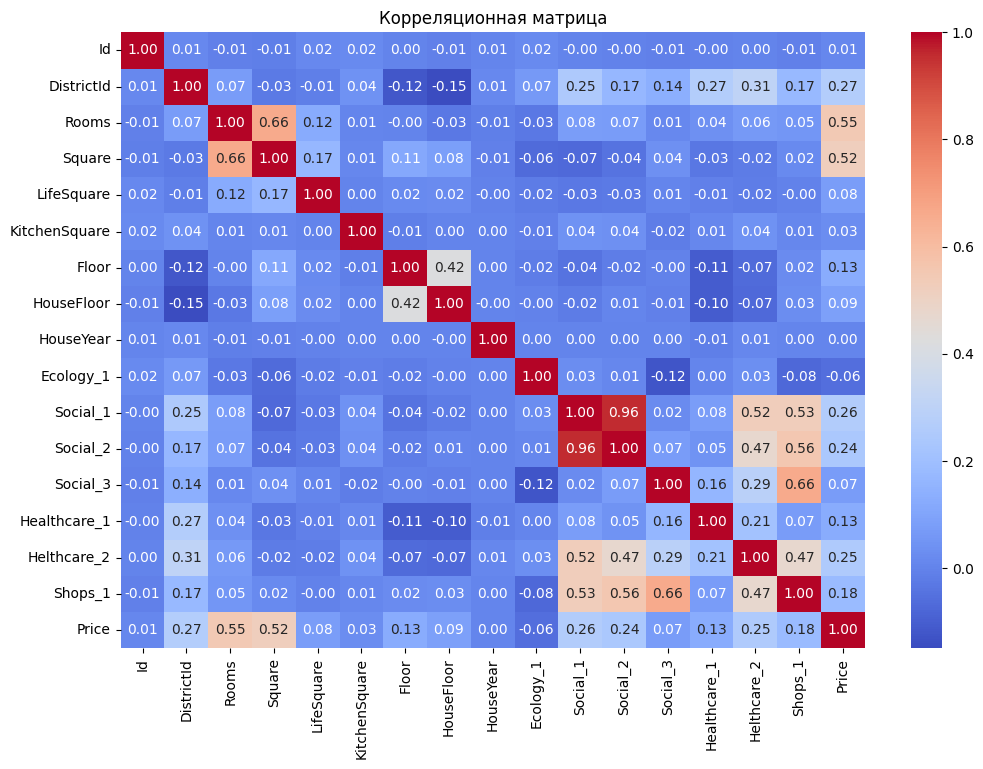

In [31]:
# Удаление категориальных переменных перед вычислением корреляции
numeric_train_data = train_data.select_dtypes(include=[np.number])

# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_train_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляционная матрица")
plt.show()

In [32]:
# Предварительная обработка данных
def preprocess_data(df):
    # Обработка пропущенных значений для числовых данных
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.median()))

    # Обработка пропущенных значений для категориальных данных
    categorical_cols = df.select_dtypes(include=[object]).columns
    df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

    # Преобразование категориальных переменных в числовые
    df = pd.get_dummies(df, drop_first=True)

    return df

# Обработка тренировочных данных
train_data = preprocess_data(train_data)

# Разделение признаков и целевой переменной
X = train_data.drop(columns=["Price"])
y = train_data["Price"]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение числовых и категориальных признаков
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

# Создание класса для предварительной обработки данных
class DataFramePreprocessor:
    def __init__(self):
        self.numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])
        self.categorical_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="constant", fill_value="missing")), ("onehot", OneHotEncoder(handle_unknown="ignore"))])
        self.preprocessor = None

    def fit(self, X):
        numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
        categorical_features = X.select_dtypes(include=["object"]).columns

        self.preprocessor = ColumnTransformer(transformers=[("num", self.numeric_transformer, numeric_features), ("cat", self.categorical_transformer, categorical_features)])
        self.preprocessor.fit(X)

    def transform(self, X):
        return self.preprocessor.transform (X)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)
                              
# Создание экземпляра класса и обработка данных
preprocessor = DataFramePreprocessor()

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [33]:
# Создание модели
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Обучение модели
start_time = time.time()
model.fit(X_train_processed, y_train)
end_time = time.time()
print(f"Время обучения модели: {end_time - start_time} секунд")

Время обучения модели: 8.923772811889648 секунд


In [34]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test_processed)

In [35]:
# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 2593049023.229524
R2 Score: 0.704478345159411


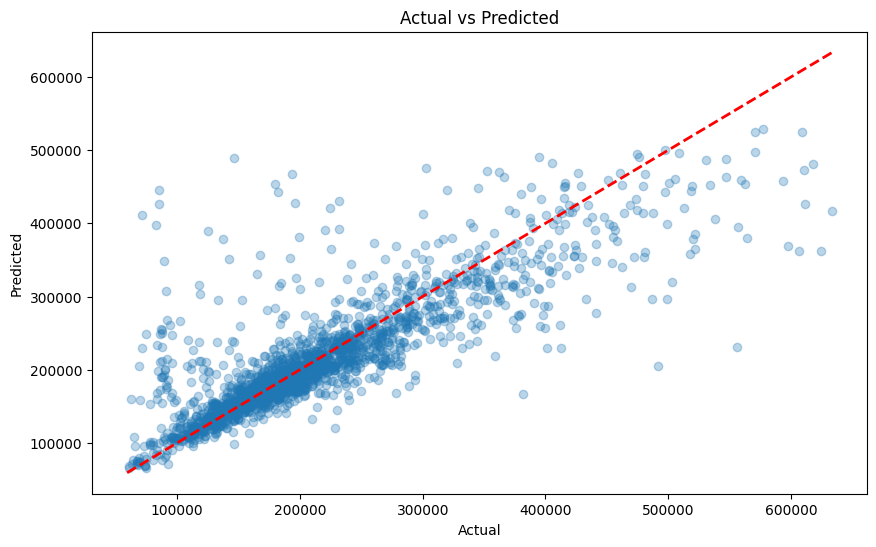

In [36]:
# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "--r", linewidth=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [37]:
# Сохранение модели и трансформера
with open("rf_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("preprocessor.pkl", "wb") as f:
    pickle.dump(preprocessor, f)

In [38]:
# Применение предварительной обработки к тестовым данным
test_data = preprocess_data(test_data)

In [39]:
# Проверка наличия всех необходимых столбцов в тестовом наборе данных
missing_cols = set(X.columns) - set(test_data.columns)
if not missing_cols:
    print("Все необходимые столбцы присутствуют в тестовом наборе данных.")
else:
    print("Missing Columns:", missing_cols)

    # Визуализация отсутствующих столбцов
    plt.figure(figsize=(10, 6))
    plt.bar(list(missing_cols), height=1.0, color="red")
    plt.title("Отсутствующие столбцы в тестовом наборе данных")
    plt.xlabel("Столбцы")
    plt.ylabel("Количество")
    plt.show()

    # Добавление отсутствующих столбцов в тестовый набор данных
    for c in missing_cols:
        test_data[c] = 0

Все необходимые столбцы присутствуют в тестовом наборе данных.


In [40]:
# Порядок столбцов должен совпадать с обучающим набором данных
test_data = test_data[X.columns]

# Проверка порядка столбцов
if list(X.columns) == list(test_data.columns):
    print("Порядок столбцов совпадает с обучающим набором данных.")
else:
    print("Порядок столбцов не совпадает с обучающим набором данных.")

    # Визуализация порядка столбцов
    plt.figure(figsize=(12, 8))
    plt.plot(X.columns, color="blue", label="Train Columns")
    plt.plot(test_data.columns, color="green", linestyle="dashed", label="Test Columns")
    plt.legend()
    plt.title("Сравнение порядка столбцов в обучающем и тестовом наборах данных")
    plt.xticks(rotation=90)
    plt.show()

Порядок столбцов совпадает с обучающим набором данных.


In [41]:
test_data.info()
test_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     5000 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Social_1       5000 non-null   int64  
 11  Social_2       5000 non-null   int64  
 12  Social_3       5000 non-null   int64  
 13  Healthcare_1   5000 non-null   float64
 14  Helthcare_2    5000 non-null   int64  
 15  Shops_1        5000 non-null   int64  
 16  Ecology_2_B    5000 non-null   bool   
 17  Ecology_3_B    5000 non-null   bool   
 18  Shops_2_

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,35.485549,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1029.396400,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,15.915345,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,766.595258,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,25.850152,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,810.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,41.769526,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,990.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [42]:
missing_values = test_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Ecology_2_B      0
Ecology_3_B      0
Shops_2_B        0
dtype: int64


In [43]:
# Предсказание для тестовых данных
X_test_final = preprocessor.transform(test_data)
test_predictions = model.predict(X_test_final)

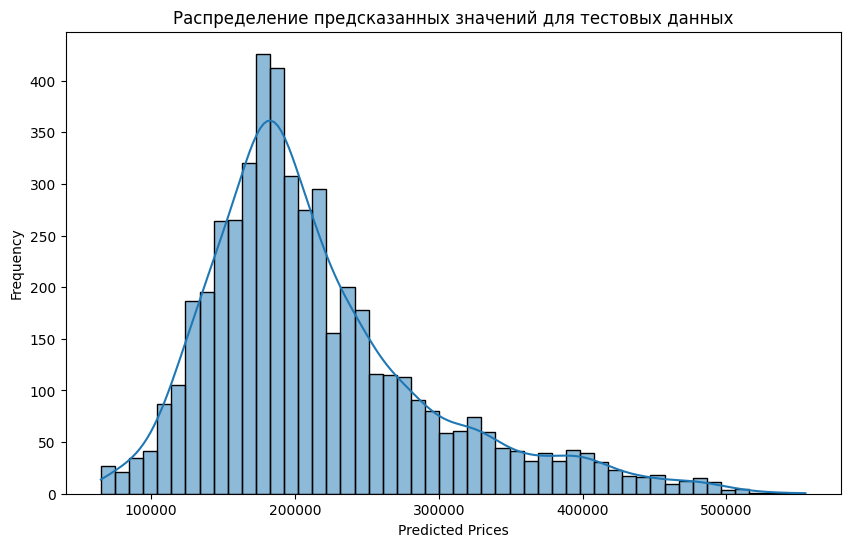

In [44]:
# Визуализация результатов для тестовых данных
plt.figure(figsize=(10, 6))
sns.histplot(test_predictions, kde=True)
plt.title("Распределение предсказанных значений для тестовых данных")
plt.xlabel("Predicted Prices")
plt.ylabel("Frequency")
plt.show()

In [46]:
# Сохранение предсказаний в файл
submission = pd.DataFrame({"Id": test_data["Id"], "Price": test_predictions})
submission.to_csv("submission.csv", index=False)

In [47]:
submission.head(10)

,Id,Price
0,725,157509.837029
1,15856,222939.525410
2,5480,180414.661086
3,15664,349301.574911
4,14275,146740.857578
5,7633,204832.234226
6,13329,180961.316113
7,5502,225414.331840
8,4220,299013.567767
9,11538,212885.701466


In [48]:
# Итоговые выводы и завершение
print(f"Время выполнения всего процесса: {time.time() - start_time} секунд")

# Вывод метрик
print(f"Train R2: {r2_score(y_train, model.predict(X_train_processed))}")
print(f"Test R2: {r2_score(y_test, y_pred)}")

Время выполнения всего процесса: 198.6116600036621 секунд
Train R2: 0.9634520700803042
Test R2: 0.704478345159411
